# SVM et LDA

## 1. Import dataset

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

In [28]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('dataset', kind='train')
X_test, y_test = mnist_reader.load_mnist('dataset', kind='t10k')




## TESTING:::
# num_samples = 100
# X_train, y_train = (X_train[:num_samples,], y_train[:num_samples])
# X_test, y_test = (X_test[:num_samples,], y_test[:num_samples])


## 2. Overview

In [29]:
X_train.shape

(60000, 784)

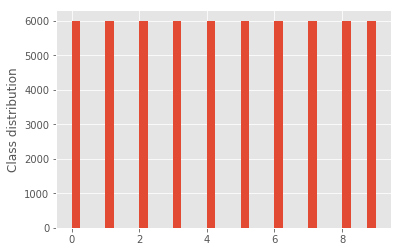

In [30]:
plt.hist(y_train, bins='auto')
plt.ylabel('Class distribution')
plt.show()

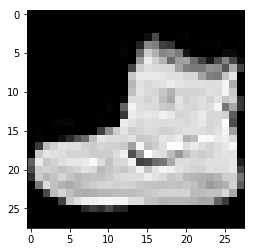

In [4]:
plt.imshow(np.reshape(X_train[0,:], (28,28)), cmap='gray')

## 3. SVM

One-vs-the-rest (OvR) multiclass/multilabel strategy

Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and one classifier only, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy for multiclass classification and is a fair default choice.

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier

https://scikit-learn.org/stable/auto_examples/plot_multilabel.html#sphx-glr-auto-examples-plot-multilabel-py


Benchmark :
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/




SVC	{"C":10,"kernel":"poly"}	0.897	0.000	1:12:39	2	2 years ago	2 years ago



https://github.com/anujdutt9/Fashion-MNIST/blob/master/svm.py

In [5]:
import sys
import time
import numpy as np
import pickle
from sklearn import model_selection, svm, preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib import style
from datetime import datetime
style.use('ggplot')

startedAt = datetime.now()
print("Starting to fit at: " + startedAt.strftime('%Y-%m-%d %H:%M:%S'))
clf = OneVsRestClassifier(SVC(gamma=0.1, kernel='poly', C=10))
clf.fit(X_train, y_train)
finishedAt = datetime.now()
print("Done at: " + finishedAt.strftime('%Y-%m-%d %H:%M:%S'))
print("Took " +(str(finishedAt-startedAt)) + " to finish.")


Starting to fit at: 2019-04-14 10:47:11
Done at: 2019-04-14 14:19:52
Took 3:32:40.559988 to finish.



Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

SVM Trained Classifier Accuracy:  0.8802

Predicted Values:  [9 2 1 ... 8 1 5]

Accuracy of Classifier on Validation Images:  0.8802

Confusion Matrix: 
 [[822   6  18  28   7   2 107   0  10   0]
 [  3 981   2  10   2   0   2   0   0   0]
 [ 30   1 799  10  84   0  75   0   1   0]
 [ 31   7  11 872  40   0  35   0   4   0]
 [  2   1  93  34 799   0  67   0   4   0]
 [  0   0   0   1   0 967   0  24   0   8]
 [130   0  75  27  69   0 693   0   6   0]
 [  0   0   0   0   0  18   0 955   0  27]
 [ 13   0   9   5   3   3  11   3 953   0]
 [  1   1   0   0   0   8   1  28   0 961]]


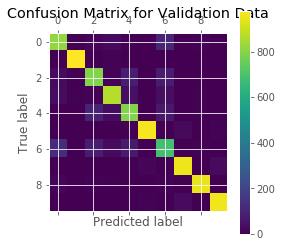

In [6]:
with open('MNIST_SVM.pickle','wb') as f:
	pickle.dump(clf, f)

pickle_in = open('MNIST_SVM.pickle','rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
acc = clf.score(X_test,y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nSVM Trained Classifier Accuracy: ',acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# LDA

These classifiers are attractive because they have closed-form solutions that can be easily computed, are inherently multiclass, have proven to work well in practice, and have no hyperparameters to tune.

https://scikit-learn.org/stable/modules/lda_qda.html

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=10)  
X_train = lda.fit_transform(X_train, y_train)  
#X_test = lda.transform(X_test)
with open('MNIST_LDA.pickle','wb') as f:
	pickle.dump(lda, f)

In [23]:
X_test.shape

(10000, 784)


Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

SVM Trained Classifier Accuracy:  0.8151

Predicted Values:  [9 2 1 ... 6 1 5]

Accuracy of Classifier on Validation Images:  0.8151

Confusion Matrix: 
 [[777   0  15  66   7   3 123   0   9   0]
 [  5 933   9  43   4   0   4   0   2   0]
 [ 24   0 682  10 165   0 110   0   9   0]
 [ 19   1  17 846  32   2  81   0   2   0]
 [  0   2 111  30 743   0 110   0   4   0]
 [  0   0   0   1   0 890   0  64  12  33]
 [134   0 131  46 106   1 558   0  24   0]
 [  0   0   0   0   0  54   0 893   1  52]
 [  2   0   5  13   3  15  36   5 920   1]
 [  0   0   0   1   0  39   2  49   0 909]]


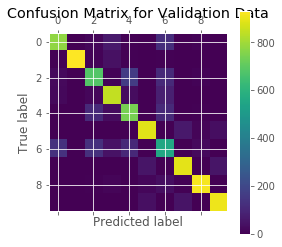

In [24]:
pickle_in = open('MNIST_LDA.pickle','rb')
lda = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
acc = lda.score(X_test,y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = lda.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nSVM Trained Classifier Accuracy: ',acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)

# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()